#**アヤメの分類**

##**【課題1】練習のために特徴量とカテゴリを選択**<br>
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

*   virgicolorとvirginica
*   sepal_lengthとpetal_length




In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris_data = load_iris()
X = pd.DataFrame(iris_data["data"], columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris_data["target"], columns=["Species"])

In [3]:
y[50:]

,Species
50,1
51,1
52,1
53,1
54,1
...,...
145,2
146,2
147,2
148,2


In [4]:
df = pd.concat([X, y],axis=1)

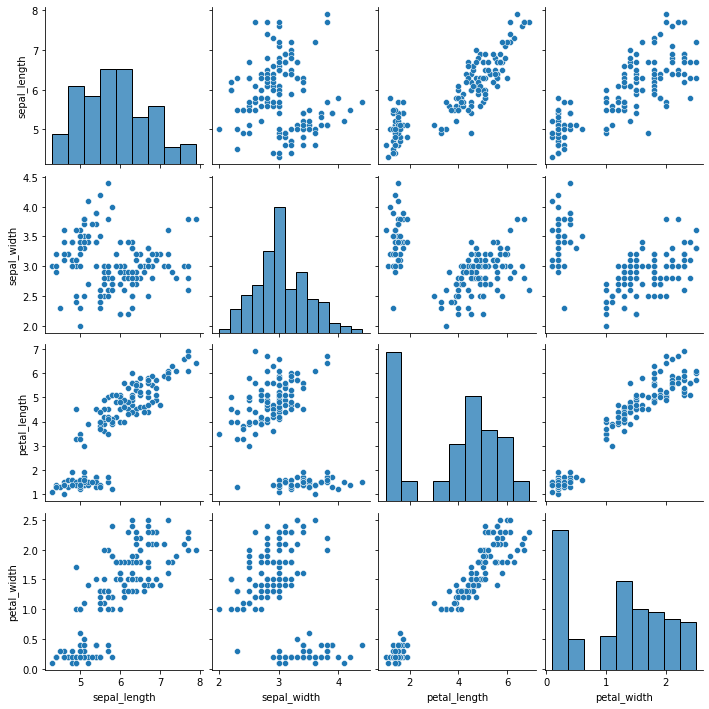

In [5]:
sns.pairplot(X)

In [6]:
#df.query("Species=='1'")
df2 = df[df["Species"].isin(["1","2"])]

 **【抽出】sepal_lengthとpetal_length** 


In [104]:
df3 = df.copy()
df_3species = df3.iloc[:,[0,2]]


In [8]:
df3 = df2.iloc[:,[0,2]]
df3

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [9]:
virgicolor_df = df3[:50]
virgicolor_df

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
55,5.7,4.5
56,6.3,4.7
57,4.9,3.3
58,6.6,4.6
59,5.2,3.9


In [10]:
virginica_df = df3[50:]
virginica_df

,sepal_length,petal_length
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [11]:
x1 = virgicolor_df["sepal_length"] 
y1 = virgicolor_df["petal_length"]

x2 = virginica_df["sepal_length"]
y2 = virginica_df["petal_length"]

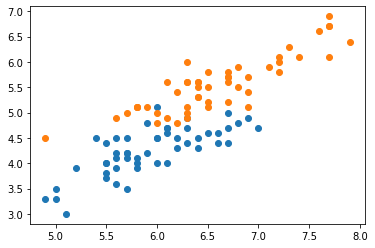

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x1, y1)
plt.scatter(x2, y2)

Text(0, 0.5, 'size')

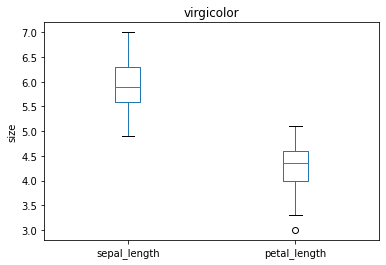

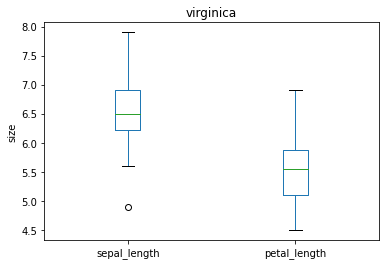

In [13]:
virgicolor_df.plot.box()
plt.title("virgicolor")
plt.ylabel("size")
virginica_df.plot.box()
plt.title("virginica")
plt.ylabel("size")

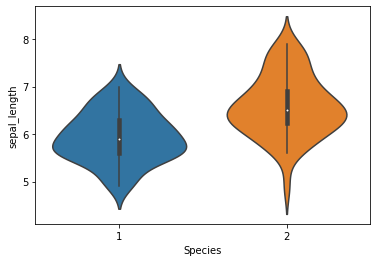

In [14]:
sns.violinplot(data=df2, x="Species", y= "sepal_length")
plt.show()

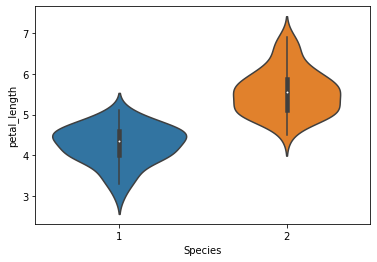

In [15]:
sns.violinplot(data=df2, x="Species", y= "petal_length")
plt.show()

In [16]:
y_target = y[50:].values

##**問題3 前処理・訓練データと検証データの分割**

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df3.values
y = y_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [18]:
y.shape

(100, 1)

##**【問題4】前処理・標準化**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


##**【問題5】学習と推定**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
model_knc = knc.fit(X_train_std, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
y_pred = model_knc.predict(X_test_std)
y_pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

In [48]:
score = model_knc.score(X_test_std, y_test)
print("score: {:.2f}".format(score))

score: 0.76


[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 2]
score: 0.88
[2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 1 1 1 1 2]
score: 0.76
[2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 1 1 1 1 2]
score: 0.76
[2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 1 1 1 1 2]
score: 0.76
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2]
score: 0.84
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 2 1 1 1 2]
score: 0.80
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 2 1 1 1 2]
score: 0.80
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 1 2 1 1 1 2]
score: 0.80
[2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 2 1 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

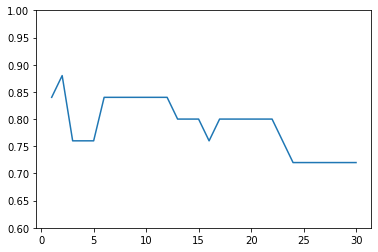

In [50]:
list_nn = []
list_score = []

for k in range(1,31):
  knc = KNeighborsClassifier(n_neighbors=k)
  model_knc = knc.fit(X_train_std, y_train)

  y_pred = model_knc.predict(X_test_std)
  print(y_pred)
  score = model_knc.score(X_test_std, y_test)
  print("score: {:.2f}".format(score))

  list_nn.append(k)
  list_score.append(score)

plt.ylim(0.6,1.0)
plt.plot(list_nn, list_score)



##**【問題6】評価**

**accuracy_score**

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.72

**precision_score**

In [25]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average="micro")
#precision_score(y_test, y_pred, average="macro")
#precision_score(y_test, y_pred, average="weighted")

0.72

**recall_score**

In [26]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average="micro")
#recall_score(y_test, y_pred, average="macro")
#recall_score(y_test, y_pred, average="weighted")

0.72

**f1_score**



In [27]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="micro")
#f1_score(y_test, y_pred, average="macro")
#f1_score(y_test, y_pred, average="weighted")

0.72

**confusion_matrix**

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[9, 6],
       [1, 9]])

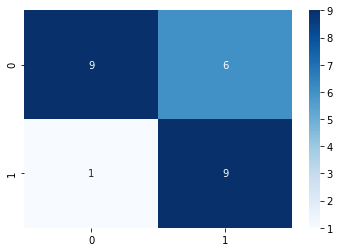

In [29]:
sns.heatmap(cm, annot=True, cmap="Blues")

In [30]:
print(cm.flatten())

[9 6 1 9]


##**4種類の指標の考察**

**Accuracy（正解率）**<br>
予測における正解数をデータ数で割った値<br>
0.0-1.0の範囲の値になり、1.0に近づくほど良い<br><br>
![](https://image.itmedia.co.jp/ait/articles/2010/27/di-02.gif)

**Precision(適合率)**<br>
機械モデルによる予測でPositiveだった予測全体のうち、正解だった割合が適合率である。つまり、機械学習モデルによる予測が陽性だった場合にどれくらい正解に「適合」できるか、ということだ。もちろん100％適合できるのが最良である。<br><br>

![](https://image.itmedia.co.jp/ait/articles/2010/27/di-03.gif)

**Recall(再現率)**<br>
　実際の「真の値（正解値）」が陽性（Positive、例：YES）のデータ全体のうち、機械学習モデルによる予測が正解だった割合が再現率（Recall）もしくは感度（Sensitivity）である。つまり、正解値が陽性である場合において機械学習モデルによる予測がどれくらいその正解を「再現」できるか、ということだ。当然、100％再現できるのが最良である。<br><br>
![](https://image.itmedia.co.jp/ait/articles/2010/27/di-04.gif)




**F値**<br>
適合率・精度・再現率の調和平均を取ったもの<br>


##**問題7　可視化**

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

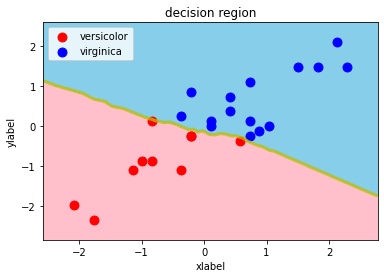

In [66]:
decision_region(X_test_std, y_pred, model=model_knc)

##**問題8　他の手法の学習**

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

**ロジスティック回帰**


In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_lr = lr.fit(X_train_std, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_pred_lr = model_lr.predict(X_test_std)
y_pred_lr

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2])

In [35]:
score_lr = model_lr.score(X_test_std, y_test)
print("score: {:.2f}".format(score_lr))

score: 0.84


**SVM**

In [68]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
model_svm = svm.fit(X_train_std, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
y_pred_svm = model_svm.predict(X_test_std)
y_pred_svm

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 2])

In [70]:
score_svm = model_svm.score(X_test_std, y_test)
print("score: {:.2f}".format(score_svm))

score: 0.88


**決定木(DecisionTree)**

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
model_tree = tree.fit(X_train_std, y_train)

In [40]:
y_pred_tree = model_tree.predict(X_test_std)
y_pred_tree

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2])

In [41]:
score_tree = model_tree.score(X_test_std, y_test)
print("score:{:.2f}".format(score_tree))

score:0.76


**ランダムフォレスト**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [43]:
y_pred_rfc = model_rfc.predict(X_test_std)
y_pred_rfc

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2])

In [44]:
score_rfc = model_rfc.score(X_test_std, y_test)
print("score:{}".format(score_rfc))


score:0.8


##**問題9　標準化の有無の比較**

In [59]:
X_test

array([[6.3, 4.9],
       [5.5, 4. ],
       [7.7, 6.1],
       [6.5, 5.2],
       [7.6, 6.6],
       [6. , 5.1],
       [7.4, 6.1],
       [6.1, 4.7],
       [6.7, 5. ],
       [6.3, 5. ],
       [5.6, 4.2],
       [5.7, 4.2],
       [6.7, 5.8],
       [6.1, 4.7],
       [5.1, 3. ],
       [6.1, 5.6],
       [6.9, 4.9],
       [6.5, 5.5],
       [5.7, 5. ],
       [6.7, 4.7],
       [6.8, 4.8],
       [6.6, 4.6],
       [4.9, 3.3],
       [6. , 4. ],
       [7.2, 6.1]])

**標準化されていないデータ**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: No contour levels were found within the data range.


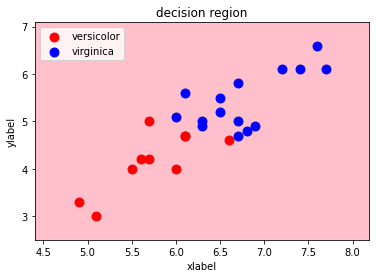

In [65]:
decision_region(X_test, y_pred, model=model_lr)

**標準化されたデータ**

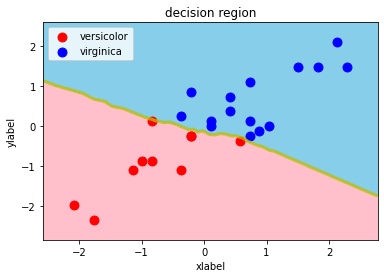

In [67]:
decision_region(X_test_std, y_pred, model=model_knc)

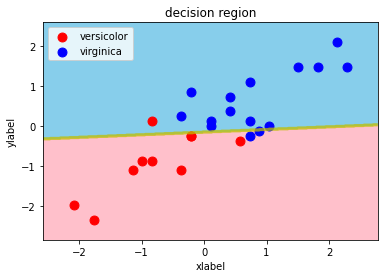

In [61]:
decision_region(X_test_std, y_pred, model=model_lr)

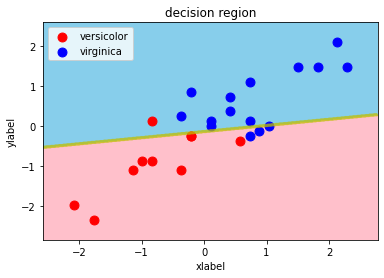

In [71]:
decision_region(X_test_std, y_pred, model=model_svm)

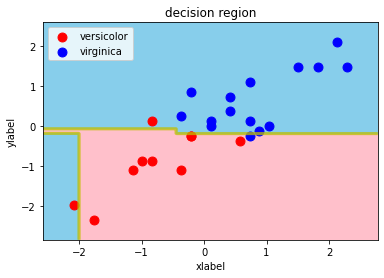

In [63]:
decision_region(X_test_std, y_pred, model=model_tree)

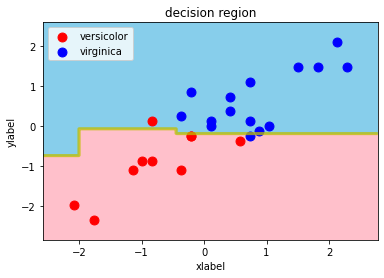

In [74]:
decision_region(X_test_std, y_pred, model=model_rfc)

標準化は平均が0、分散が1になるようにデータを加工することである。<br>
<br>
___
K-NN は近くにあるｋ個オブジェクトのうち、最も一般的なクラスに分類する。ｋの設定によって精度が変わる。データ数や特徴量が増えると予測が遅くなる特徴がある**
___
ロジスティック回帰は分類のためのアリゴリズムで、特徴量空間が線形分離可能な場合のみ高い性能を発揮する。
___
サポートベクターマシーンはパターン認識性能に優れた学習モデルで境界からもっとも近いベクトルの距離を示す。ロジスティック回帰と同様に直線的でわかりやすい
___
決定木は可読性が高く外れ値に対して頑健、過学習を起こしやすくパラメータの調整が重要になる。分類性能はSVMの方が強いと思われる
___
ランダムフォレストは決定木を複数作り多数決することで、決定木の過学習を平準化する。標準化や正規化を気にせずに使える



##**問題10　全ての目的変数を使用して精度が高い手法**

In [79]:
iris_data = load_iris()
#X_2 = pd.DataFrame(iris_data["data"], columns=["sepal_length","sepal_width","petal_length","petal_width"])
y_2 = pd.DataFrame(iris_data["target"], columns=["Species"])

In [ ]:
X_2_ar = df_3species.values
y_2_ar = y_2.values
print(X_2_ar)
print(y_2_ar)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_2_ar, y_2_ar, test_size=0.25)

In [108]:
lr = LogisticRegression()
model_lr2 = lr.fit(X_train, y_train)
y_pred_lr2 = model_lr2.predict(X_test)
score_lr2 = model_lr2.score(X_test, y_test)
print("score:{}".format(score_lr2))


score:0.9736842105263158


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
knc = KNeighborsClassifier()
model_knc2 = knc.fit(X_train, y_train)
y_pred_knc2 = model_knc2.predict(X_test)
score_knc2 = model_knc2.score(X_test, y_test)
print("score:{}".format(score_knc2))


score:0.9736842105263158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [119]:
svm = LinearSVC()
model_svm2 = svm.fit(X_train, y_train)
y_pred_svm2 = model_svm2.predict(X_test)
score_svm2 = model_svm2.score(X_test, y_test)
print("score:{}".format(score_svm2))


score:0.9210526315789473


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
tree = DecisionTreeClassifier()
model_tree2 = tree.fit(X_train, y_train)
y_pred_tree2 = model_tree2.predict(X_test)
score_tree2 = model_tree2.score(X_test, y_test)
print("score:{}".format(score_tree2))


score:0.9736842105263158


In [121]:
rfc = RandomForestClassifier()
model_rfc2 = rfc.fit(X_train, y_train)
y_pred_rfc2 = model_rfc2.predict(X_test)
score_rfc2 = model_rfc2.score(X_test, y_test)
print("score:{}".format(score_rfc2))


score:0.9736842105263158


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [98]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['greenyellow','pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [115]:
X_test.shape

(38, 2)

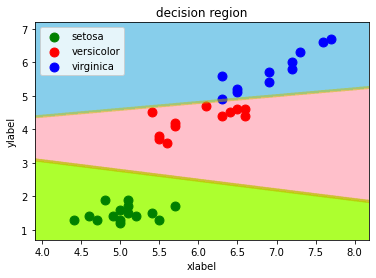

In [116]:
decision_region_2(X_test, y_pred_lr2, model=model_lr2)

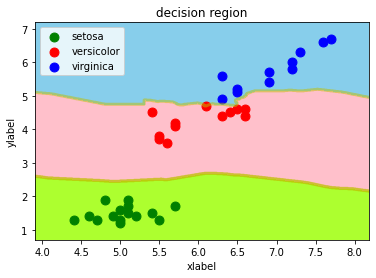

In [122]:
decision_region_2(X_test, y_pred_lr2, model=model_knc2)

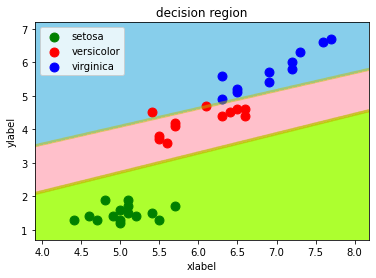

In [123]:
decision_region_2(X_test, y_pred_lr2, model=model_svm2)

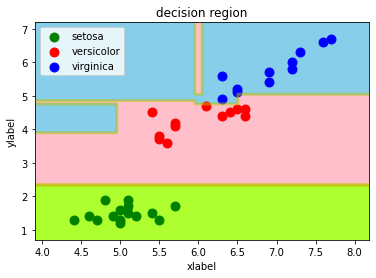

In [124]:
decision_region_2(X_test, y_pred_lr2, model=model_tree2)

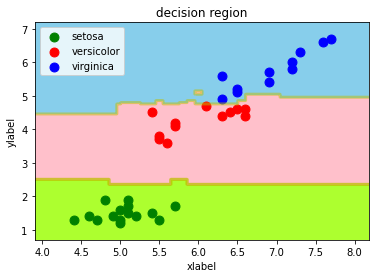

In [125]:
decision_region_2(X_test, y_pred_lr2, model=model_rfc2)